In [1]:
%%capture
!pip install ipynb
!pip install s3fs
!pip install nvidia-ml-py3

In [205]:
import os
from ipynb.fs.full.eval_metrics import *
import pandas as pd
import json
import s3fs
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('german'))
import keras.utils
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report 


def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
#df['text'] = df['text'].apply(clean_text)
#df['text'] = df['text'].str.replace('\d+', '')

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import torch
torch.cuda.is_available()

True

In [206]:
# Opening JSON file
with open('../credentials.json', 'r') as openfile:
 
    # Reading from json file
    json_object = json.load(openfile)
    key = json_object["key"]
    secret = json_object["secret_key"]
    bucket_name = json_object["bucket_name"]

s3 = s3fs.S3FileSystem(anon=False,key=key,secret=secret)

In [213]:
fold = 4
EPOCHS = 7
BATCH_SIZE = 64
train_test_number = [1,2,3,4,5]

Fold Number: 1
Found 7632 unique tokens.
Shape of data tensor: (926, 250)
Shape of label tensor: (926, 2)
Shape of data tensor: (232, 250)
Shape of label tensor: (232, 2)


/tmp/ipykernel_26832/1584456909.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  train['text'] = train['text'].str.replace('\d+', '')
/tmp/ipykernel_26832/1584456909.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  test['text'] = test['text'].str.replace('\d+', '')


Epoch 1/7
14/14 [==============================] - 11s 577ms/step - loss: 0.6419 - accuracy: 0.6627 - val_loss: 0.6016 - val_accuracy: 0.6559
Epoch 2/7
14/14 [==============================] - 8s 567ms/step - loss: 0.5719 - accuracy: 0.6939 - val_loss: 0.5797 - val_accuracy: 0.6559
Epoch 3/7
14/14 [==============================] - 8s 561ms/step - loss: 0.5013 - accuracy: 0.7899 - val_loss: 0.5517 - val_accuracy: 0.6882
Epoch 4/7
14/14 [==============================] - 8s 570ms/step - loss: 0.3390 - accuracy: 0.9172 - val_loss: 0.5738 - val_accuracy: 0.7204
Epoch 5/7
14/14 [==============================] - 8s 569ms/step - loss: 0.1355 - accuracy: 0.9544 - val_loss: 0.6411 - val_accuracy: 0.7097
Epoch 6/7
8/8 [==============================] - 0s 53ms/step - loss: 0.6845 - accuracy: 0.6466
Test set
  Loss: 0.685
  Accuracy: 0.647
4/4 [==============================] - 0s 49ms/step
                             1
0                             
acc                   0.646552
bal_acc     

/tmp/ipykernel_26832/1584456909.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  train['text'] = train['text'].str.replace('\d+', '')
/tmp/ipykernel_26832/1584456909.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  test['text'] = test['text'].str.replace('\d+', '')


Epoch 1/7
14/14 [==============================] - 10s 584ms/step - loss: 0.6358 - accuracy: 0.6783 - val_loss: 0.5985 - val_accuracy: 0.6559
Epoch 2/7
14/14 [==============================] - 8s 570ms/step - loss: 0.5625 - accuracy: 0.6939 - val_loss: 0.6107 - val_accuracy: 0.6559
Epoch 3/7
14/14 [==============================] - 8s 565ms/step - loss: 0.5133 - accuracy: 0.7299 - val_loss: 0.5567 - val_accuracy: 0.6559
Epoch 4/7
14/14 [==============================] - 8s 567ms/step - loss: 0.3752 - accuracy: 0.8655 - val_loss: 0.5132 - val_accuracy: 0.7742
Epoch 5/7
14/14 [==============================] - 8s 583ms/step - loss: 0.1868 - accuracy: 0.9532 - val_loss: 0.4966 - val_accuracy: 0.7957
Epoch 6/7
14/14 [==============================] - 8s 580ms/step - loss: 0.0567 - accuracy: 0.9832 - val_loss: 0.6456 - val_accuracy: 0.7527
Epoch 7/7
8/8 [==============================] - 0s 52ms/step - loss: 0.9590 - accuracy: 0.6940
Test set
  Loss: 0.959
  Accuracy: 0.694
4/4 [===========

/tmp/ipykernel_26832/1584456909.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  train['text'] = train['text'].str.replace('\d+', '')
/tmp/ipykernel_26832/1584456909.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  test['text'] = test['text'].str.replace('\d+', '')


Epoch 1/7
14/14 [==============================] - 10s 609ms/step - loss: 0.6356 - accuracy: 0.6807 - val_loss: 0.6092 - val_accuracy: 0.6452
Epoch 2/7
14/14 [==============================] - 8s 561ms/step - loss: 0.5572 - accuracy: 0.6951 - val_loss: 0.6017 - val_accuracy: 0.6452
Epoch 3/7
14/14 [==============================] - 8s 577ms/step - loss: 0.4794 - accuracy: 0.8091 - val_loss: 0.8276 - val_accuracy: 0.6452
Epoch 4/7
14/14 [==============================] - 8s 570ms/step - loss: 0.3973 - accuracy: 0.8703 - val_loss: 0.5578 - val_accuracy: 0.6559
Epoch 5/7
14/14 [==============================] - 8s 568ms/step - loss: 0.1916 - accuracy: 0.9556 - val_loss: 0.5676 - val_accuracy: 0.7419
Epoch 6/7
14/14 [==============================] - 8s 569ms/step - loss: 0.0733 - accuracy: 0.9796 - val_loss: 0.7380 - val_accuracy: 0.6989
Epoch 7/7
8/8 [==============================] - 0s 54ms/step - loss: 0.8285 - accuracy: 0.7198
Test set
  Loss: 0.828
  Accuracy: 0.720
4/4 [===========

/tmp/ipykernel_26832/1584456909.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  train['text'] = train['text'].str.replace('\d+', '')
/tmp/ipykernel_26832/1584456909.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  test['text'] = test['text'].str.replace('\d+', '')


Epoch 1/7
14/14 [==============================] - 10s 590ms/step - loss: 0.6545 - accuracy: 0.6631 - val_loss: 0.6113 - val_accuracy: 0.6452
Epoch 2/7
14/14 [==============================] - 8s 569ms/step - loss: 0.5869 - accuracy: 0.6942 - val_loss: 0.6003 - val_accuracy: 0.6452
Epoch 3/7
14/14 [==============================] - 8s 569ms/step - loss: 0.5132 - accuracy: 0.7410 - val_loss: 0.5793 - val_accuracy: 0.6452
Epoch 4/7
14/14 [==============================] - 8s 572ms/step - loss: 0.3825 - accuracy: 0.8801 - val_loss: 0.5981 - val_accuracy: 0.6452
Epoch 5/7
14/14 [==============================] - 8s 558ms/step - loss: 0.1746 - accuracy: 0.9664 - val_loss: 0.8005 - val_accuracy: 0.6989
Epoch 6/7
8/8 [==============================] - 0s 54ms/step - loss: 0.7556 - accuracy: 0.6623
Test set
  Loss: 0.756
  Accuracy: 0.662
4/4 [==============================] - 0s 46ms/step
                             1
0                             
acc                   0.662338
bal_acc     

/tmp/ipykernel_26832/1584456909.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  train['text'] = train['text'].str.replace('\d+', '')
/tmp/ipykernel_26832/1584456909.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  test['text'] = test['text'].str.replace('\d+', '')


Epoch 1/7
14/14 [==============================] - 10s 584ms/step - loss: 0.6507 - accuracy: 0.6823 - val_loss: 0.6246 - val_accuracy: 0.6237
Epoch 2/7
14/14 [==============================] - 8s 564ms/step - loss: 0.5779 - accuracy: 0.6978 - val_loss: 0.6502 - val_accuracy: 0.6237
Epoch 3/7
14/14 [==============================] - 8s 570ms/step - loss: 0.5055 - accuracy: 0.7278 - val_loss: 0.6028 - val_accuracy: 0.6237
Epoch 4/7
14/14 [==============================] - 8s 575ms/step - loss: 0.3620 - accuracy: 0.8825 - val_loss: 0.5629 - val_accuracy: 0.6882
Epoch 5/7
14/14 [==============================] - 8s 564ms/step - loss: 0.1827 - accuracy: 0.9700 - val_loss: 0.6577 - val_accuracy: 0.6882
Epoch 6/7
14/14 [==============================] - 8s 567ms/step - loss: 0.0740 - accuracy: 0.9736 - val_loss: 0.7031 - val_accuracy: 0.7312
Epoch 7/7
8/8 [==============================] - 0s 53ms/step - loss: 0.7050 - accuracy: 0.7013
Test set
  Loss: 0.705
  Accuracy: 0.701
4/4 [===========

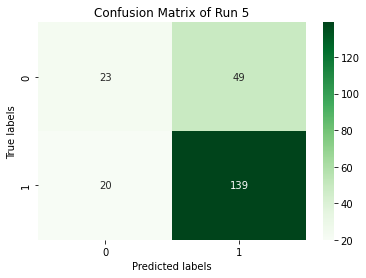

In [214]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

for train_index in train_test_number:
    print(f"Fold Number: {train_index}")
    # Read data
    with s3.open(f"{bucket_name}/KFOLD{train_index}/train.csv",'r') as file:
        train = pd.read_csv(file)
    with s3.open(f"{bucket_name}/KFOLD{train_index}/test.csv",'r') as file:
        test = pd.read_csv(file)
    train = train[["Text", "majority_vote"]]
    test = test[["Text", "majority_vote"]]
    train.rename(columns={'Text': 'text', 'majority_vote': 'labels'}, inplace=True)
    test.rename(columns={'Text': 'text', 'majority_vote': 'labels'}, inplace=True)
    
    train['text'] = train['text'].apply(clean_text)
    train['text'] = train['text'].str.replace('\d+', '')
    test['text'] = test['text'].apply(clean_text)
    test['text'] = test['text'].str.replace('\d+', '')
    
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
    #tokenizer.fit_on_texts(df['text'].values)
    tokenizer.fit_on_texts(train['text'].values)
    tokenizer.fit_on_texts(test['text'].values)
    word_index = tokenizer.word_index
    print('Found %s unique tokens.' % len(word_index))
    
    X_train = tokenizer.texts_to_sequences(train['text'].values)
    X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
    X_test = tokenizer.texts_to_sequences(test['text'].values)
    X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
    Y_train = pd.get_dummies(train['labels']).values
    Y_test = pd.get_dummies(test['labels']).values
    
    print('Shape of data tensor:', X_train.shape)
    print('Shape of label tensor:', Y_train.shape)
    print('Shape of data tensor:', X_test.shape)
    print('Shape of label tensor:', Y_test.shape)
    
    model = Sequential()
    model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    epochs = EPOCHS
    batch_size = BATCH_SIZE

    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
    accr = model.evaluate(X_test,Y_test)
    print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
    y_pred = model.predict(X_test, batch_size=64, verbose=1)
    y_pred = np.argmax(y_pred, axis=1)
    
    test_list = test["labels"].tolist()
    test_list = np.array(test_list)

    # Compute Evaluation Metrics
    f = f1_multiclass(test_list, y_pred)
    p = p_multiclass(test_list, y_pred)
    r = recall_multiclass(test_list, y_pred)
    a = accuracy_score(test_list, y_pred)
    ba = balanced_accuracy_score(test_list, y_pred)
    prs = precision_recall_fscore_support(test_list, y_pred)
    m = matthews_corrcoef(test_list,y_pred)

    results = {}
    results["acc"] = a
    results["f1"] = f
    results["precision"] = p
    results["recall"] = r
    results["bal_acc"] = ba
    results["prfs"] = prs
    results["mcc"] = m

    prepare_results(results)
    result_df = dict_to_df(results)
    result_df.to_csv(f"LSTM_{train_index}.csv")
    print(result_df)
    class_rep = classification_report(test_list, y_pred,target_names=["HOF", "NOT"])
    cm = confusion_matrix(test_list, y_pred,)
    ax = plt.subplot()
    cm_plot = sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(F'Confusion Matrix of Run {train_index}') 
    #ax.xaxis.set_ticklabels(['HOF', 'NOT'])
    #ax.yaxis.set_ticklabels(['HOF', 'NOT']);
    #cm_plot.figure.savefig(f"LSTM_best_model/confusion_matrix_{train_index}.png")
    print(f"Finished Fold Number: {train_index}")

In [216]:
# mit 7 epochs
baseline = kfold_evaluation("LSTM_")
baseline

,Metrics,Overall Results
0,acc,0.684796
1,bal_acc,0.592989
2,mcc,0.211767
3,f1_macro,0.595506
4,f1_micro,0.684796
5,f1_weighted,0.667165
6,precision_macro,0.621415
7,precision_micro,0.684796
8,precision_weighted,0.667002
9,recall_macro,0.592989


In [211]:
# mit 3 epochs
baseline = kfold_evaluation("LSTM_")
baseline

,Metrics,Overall Results
0,acc,0.685666
1,bal_acc,0.532006
2,mcc,0.095178
3,f1_macro,0.482430
4,f1_micro,0.685666
5,f1_weighted,0.604274
6,precision_macro,0.583900
7,precision_micro,0.685666
8,precision_weighted,0.630871
9,recall_macro,0.532006


# Plots

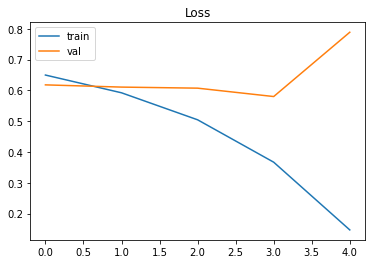

In [190]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show();

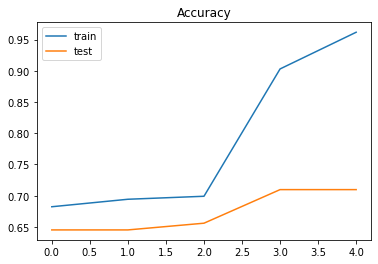

In [191]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();